# Dados estatisticos sobre os dados das espiras

In [1]:
import csv
from datetime import datetime, timedelta
#threshold = 350
espiras_cont = {} #nr de registos de cada espira, soma das contagens por hora para calcular media e mediana
espiras_cont_old = {}
n_errors = {} #contar os valores que estão acima do threshold por hora FIXME
espiras_geo = []
zonas =[]
avg_total = []
def datetime_range(start, end, delta):
    current = start
    while current < end:
        yield current
        current += delta

dts = [dt.strftime('%H:%M') for dt in 
       datetime_range(datetime(2016, 9, 1, 0), datetime(2016, 9, 1, 23, 59), 
       timedelta(minutes=15))]
int_to_hour={}
for i in range(len(dts)):
    int_to_hour[i] = dts[i]

    
new_file = open("extreme_values.csv","w")
new_file.write("id,date,value,hour\n")
contagens = open("/home/vasco/tese/dados_camara_todos.csv", "r") #dados 2018
reader = csv.reader(contagens)
next(reader, None) #skips the header
i = 0
for row in reader:
    if row[3][2:] == "":
        continue
    #if i==0:
    #    for i in row[4:]:
    #        avg_total.append([float(i)])
    #        i=1
    #else:
    #    for i in range(len(row[4:])):
    #        try:
    #            avg_total[i].append(float(row[4:][i]))
    #        except:
    #            print(row[4:][i])
    
    if (row[1],row[3][2:]) not in espiras_cont: #o row[3][2:] e para ignorar o ct e manter so o id da espira
        espiras_cont[(row[1], row[3][2:])] = row[4:]
        espiras_cont[(row[1], row[3][2:])].insert(0,1)
    else:
        espiras_cont[(row[1],row[3][2:])][1:] = [float(x) + float(y) for x, y in zip(espiras_cont[(row[1],row[3][2:])][1:],row[4:])]
        espiras_cont[(row[1],row[3][2:])][0] += 1
    for value in range(len(row[4:])):
        if float(row[4:][value]) >= 2000:
            new_file.write(str(row[1])+":"+str(row[3][2:])+ ","+ str(row[0]) + "," + str(row[4:][value])+ "," + str(int_to_hour[value]) +"\n")
        
new_file.close()
contagens.close()
#print(espiras_cont)
#print(avg_total[1])

contagens_old = open("/home/vasco/tese/dados_camara_todos.csv", "r") #dados antigos
reader_old = csv.reader(contagens_old)
next(reader_old, None) #skips the header
i = 0
for row in reader_old:
    
    try:
        if (row[1],row[3][2:]) not in espiras_cont_old:
            espiras_cont_old[(row[1], row[3][2:])] = row[4:]
            espiras_cont_old[(row[1], row[3][2:])].insert(0,1)
        else:
            espiras_cont_old[(row[1],row[3][2:])][1:] = [float(x) + float(y) for x, y in zip(espiras_cont_old[(row[1],row[3][2:])][1:],row[4:])]
            espiras_cont_old[(row[1],row[3][2:])][0] += 1
        i+=1
    except:
        continue

contagens_old.close()

espiras = open("espiras_geo.csv","r")
reader = csv.reader(espiras)

next(reader, None) #skips the header
for row in reader:
    if (row[1],row[2]) not in espiras_geo:
        espiras_geo.append((row[1],row[2]))
    if row[1] not in zonas:
        zonas.append(row[1])
chaves = espiras_cont.keys()
chaves_old = espiras_cont_old.keys()
espiras.close()
#print(chaves)
#print(len(espiras_geo))
#print(espiras_cont)

#if i < 5:
#    print(row[1],row[3],row[4])
#    i+=1

## Percentagem de espiras que retornam dados atualmente
    

In [3]:
lista = list(chaves_old)
myset = set(lista)
print(len(myset))
print(len(chaves_old))

working_ratio = (len(chaves)/len(espiras_geo))*100
working_ratio_old = (len(chaves_old)/len(espiras_geo))*100
print("Atualmente " + str(round(working_ratio,2)) +" % de todas as espiras georeferenciadas retornaram dados pelo menos uma vez")
print("Nos dados antigos " + str(round(working_ratio_old,2)) +" % de todas as espiras georeferenciadas (atualmente) retornam dados pelo menos uma vez")
#print(espiras_geo)
#inserir aqui um gráfico eventualmente

174
174
Atualmente 137.3 % de todas as espiras georeferenciadas retornaram dados pelo menos uma vez
Nos dados antigos 138.1 % de todas as espiras georeferenciadas (atualmente) retornam dados pelo menos uma vez


In [5]:
nr_espiras_obs = {} #dicionario com o numero de espiras disponiveis por zona em que as chaves são o id da zona
nr_espiras_expected = {} #igual mas com os valores expectaveis
for i in zonas:
    for k in chaves:
        if k[0] == i:
            if k[0] not in nr_espiras_obs:
                nr_espiras_obs[k[0]] = 1
            else:
                nr_espiras_obs[k[0]] +=1
    for j in espiras_geo:
        if j[0] == i:
            if j[0] not in nr_espiras_expected:
                nr_espiras_expected[j[0]] = 1
            else:
                nr_espiras_expected[j[0]] +=1
                
        
ratio_zona2= [] #lista com a percentagem de espiras a funcionar por zona

for i in zonas:
    try:
        ratio_zona2.append(nr_espiras_obs[str(i)]/nr_espiras_expected[str(i)])
    except:
        ratio_zona2.append(0)
#print(ratio_zona2)
#print(list(nr_espiras_expected.keys()))
#print(list(nr_espiras_obs.keys()))
ratio_zona = {k: nr_espiras_obs[k]/nr_espiras_expected[k] for k in nr_espiras_expected.keys() & nr_espiras_obs}
s = list(ratio_zona.items())
print(nr_espiras_expected)
print(nr_espiras_obs)
print(ratio_zona2)
#print(list(s))
print(len(zonas))
print(len(list(nr_espiras_obs.items())))
#print(list(nr_espiras_obs.values()))
x = list(nr_espiras_expected.items())
y = list(nr_espiras_obs.items())
print(x)
print(y)
total=0
for i in range(len(x)):
    total = total + abs(x[i][1] - y[i][1])
print(total)
    

{'1': 4, '2': 10, '3': 17, '4': 7, '5': 7, '6': 23, '7': 13, '9': 3, '10': 8, '12': 4, '13': 3, '14': 2, '21': 8, '22': 10, '23': 7}
{'1': 5, '2': 11, '3': 22, '4': 12, '5': 11, '6': 24, '7': 14, '9': 4, '10': 9, '12': 8, '13': 13, '14': 14, '21': 8, '22': 10, '23': 8}
[1.25, 1.1, 1.2941176470588236, 1.7142857142857142, 1.5714285714285714, 1.0434782608695652, 1.0769230769230769, 1.3333333333333333, 1.125, 2.0, 4.333333333333333, 7.0, 1.0, 1.0, 1.1428571428571428]
15
15
[('1', 4), ('2', 10), ('3', 17), ('4', 7), ('5', 7), ('6', 23), ('7', 13), ('9', 3), ('10', 8), ('12', 4), ('13', 3), ('14', 2), ('21', 8), ('22', 10), ('23', 7)]
[('1', 5), ('2', 11), ('3', 22), ('4', 12), ('5', 11), ('6', 24), ('7', 14), ('9', 4), ('10', 9), ('12', 8), ('13', 13), ('14', 14), ('21', 8), ('22', 10), ('23', 8)]
47


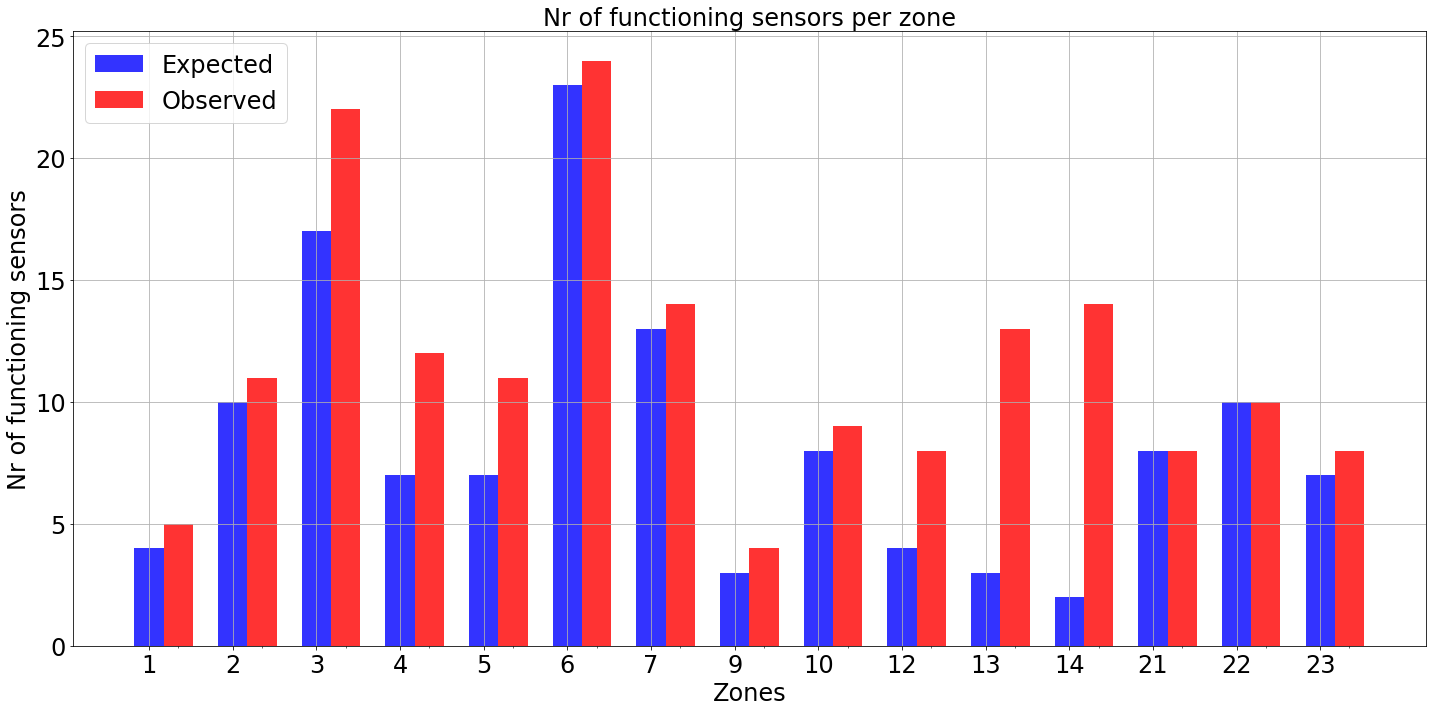

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
 
# data to plot
n_groups = len(zonas)
ratio_perc = [i * 100 for i in ratio_zona2]
expected = list(nr_espiras_expected.values())

obs = list(nr_espiras_obs.values()) 
#obs.insert(0,0) #hack to insert the missing zones in the observed data
#obs.insert(10,0)
#obs.insert(len(obs),0)
 
# create plot
fig = plt.figure(figsize=(20,10))
s1 = plt.subplot(111) #plot with the absolute values
#s2 = plt.subplot(122) #ratio of working sensors
#fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = s1.bar(zonas, expected, bar_width,
alpha=opacity,
color='b',
label='Expected')

rects2 = s1.bar(index + bar_width, obs, bar_width,
alpha=opacity,
color='r',
label='Observed')
 
s1.set_xlabel('Zones',fontsize=24)
s1.set_ylabel('Nr of functioning sensors',fontsize=24)
s1.set_title('Nr of functioning sensors per zone',fontsize=24)
s1.set_xticks(index + bar_width, zonas)
s1.legend(loc=2, prop={'size': 24})
s1.tick_params(axis='both', which='major', labelsize=24)
s1.grid(True)
#rects3 = s2.bar(zonas, ratio_perc, bar_width,
#alpha=opacity,
#color='r',
#label='(Observado/Esperado)*100')

#s2.set_xlabel('Zonas')
#s2.set_ylabel('% de espiras a funcionar')
#s2.set_title('% de espiras a funcionar por zona')
#s2.set_xticks(index + bar_width, zonas)
#s2.legend()

plt.tight_layout()
plt.show()
fig.savefig('espiras_por_zona.png')

## Valores médios das contagens por hora

In [6]:
import copy
avg_cont = copy.deepcopy(espiras_cont)
#print(avg_cont)
for k in avg_cont:
    for i in range(len(avg_cont[k])):
        if i > 0:
            avg_cont[k][i] = float(avg_cont[k][i])/float(avg_cont[k][0])
#print(avg_cont)

#Falta implementar desvio padrão
avg_cont[('3','13')]
            
        

[2011,
 498.60765788165094,
 471.96369965191445,
 469.7289905519642,
 483.29090004972653,
 468.04027846842365,
 468.02536051715566,
 455.8876181004475,
 467.8483341621084,
 474.58975634012927,
 463.7503729487817,
 493.88115365489807,
 482.7757334659373,
 473.8950770760816,
 470.97812033814023,
 495.54152163102935,
 472.05420188960716,
 481.765788165092,
 469.949776230731,
 460.81203381402287,
 439.3644952759821,
 448.38339134758826,
 446.3137742416708,
 437.340129288911,
 389.7812033814023,
 397.81949278965686,
 394.2953754351069,
 376.90601690701146,
 371.87667826951764,
 377.3749378418697,
 367.5206364992541,
 381.3968175037295,
 397.0730979612133,
 405.65738438587766,
 417.297364495276,
 420.6444554947787,
 424.1566384883143,
 390.332670313277,
 386.6066633515664,
 394.55793137742415,
 390.8776727996022,
 381.8488314271507,
 384.33714569865737,
 392.4201889607161,
 394.73097961213324,
 387.6797613127797,
 396.4361014420686,
 391.92441571357534,
 409.07409249129785,
 400.162108403779

## Valor médio ao longo do dia

In [7]:
import plotly
import plotly.offline as off
import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
plotly.tools.set_credentials_file(username='vasco_leal', api_key='30n8NHRdxihdGZgPR2Wz')


df = pd.read_csv("/home/vasco/tese/dados_camara_todos.csv")

df['unique_id'] = df.Zona.astype(str) + '_' + df.ID_Espira.astype(str)
df['unique_id'] = df['unique_id'].str.lower()
colors = ['blue', 'orange', 'green', 'red', 'purple']


#print(df['unique_id'])


avg_df = df.groupby(['unique_id'], as_index =False).mean()
std_df = df.groupby(['unique_id']).std().reset_index()
#print(avg_df)
#print(avg_df.head())
#print(std_df.head())
pa = std_df[std_df['unique_id'] == "10_ct1"]
#x = pa.values.tolist()
#print(x)
data = []
for index, row in avg_df.iterrows():
    xx = list(avg_df)[2:]
    yy = list(row[2:])
    pa = std_df[std_df['unique_id'] == row[0]]
    list_stdev = pa.values.tolist()
    trace = go.Bar(x = xx, y = yy, name = row['unique_id'],  marker=dict(color='rgb(239, 92, 7)'),
    error_y=dict(
        type='data',
        array=list_stdev[0][2:],
        visible=False))
    data.append(trace)
#    (df.groupby(['unique_id', 'org'], as_index=False).mean()
#            .groupby('cluster')['time'].mean())
    
#trace1 = go.Bar(
#    x=[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
#       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
#    y=[219, 146, 112, 127, 124, 180, 236, 207, 236, 263,
#       350, 430, 474, 526, 488, 537, 500, 439],
#    name='Rest of world',
#    marker=dict(
#        color='rgb(55, 83, 109)'
#    )

layout = go.Layout(
    title='Média das contagens por espira por hora',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Numero de carros registados',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    showlegend=True
)

fig = go.Figure(data=data, layout=layout)
#off.iplot({'data': data, 'layout': layout}, validate=False)
py.iplot(fig, filename='style-bar')
    


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~vasco_leal/0 or inside your plot.ly account where it is named 'style-bar'


/home/vasco/anaconda3/envs/tese/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



## Listagem de espiras que não retornam dados

In [9]:

df2 = pd.read_csv("/home/vasco/tese/Espiras/InfoCentral_20180119_1803/dados_camara.csv")

df2['unique_id'] = df2.Zona.astype(str) + '_' + df2.ID_Espira.astype(str)
df2['unique_id'] = df2['unique_id'].str.lower()
colors = ['blue', 'orange', 'green', 'red', 'purple']


#print(df['unique_id'])


avg_df2 = df2.groupby(['unique_id'], as_index =False).mean()
std_df2 = df2.groupby(['unique_id']).std().reset_index()
#print(avg_df)
#print(avg_df.head())
#print(std_df.head())
pa = std_df2[std_df2['unique_id'] == "10_ct1"]
#x = pa.values.tolist()
#print(x)
data2 = []
for index, row in avg_df2.iterrows():
    xx = list(avg_df2)[2:]
    yy = list(row[2:])
    pa = std_df2[std_df2['unique_id'] == row[0]]
    list_stdev = pa.values.tolist()
    trace = go.Bar(x = xx, y = yy, name = row['unique_id'],  marker=dict(color='rgb(239, 92, 7)'),
    error_y=dict(
        type='data',
        array=list_stdev[0][2:],
        visible=False))
    data2.append(trace)
#    (df.groupby(['unique_id', 'org'], as_index=False).mean()
#            .groupby('cluster')['time'].mean())
    
#trace1 = go.Bar(
#    x=[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
#       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
#    y=[219, 146, 112, 127, 124, 180, 236, 207, 236, 263,
#       350, 430, 474, 526, 488, 537, 500, 439],
#    name='Rest of world',
#    marker=dict(
#        color='rgb(55, 83, 109)'
#    )

layout = go.Layout(
    title='Média das contagens por espira por hora',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Numero de carros registados',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    showlegend=True
)

fig2 = go.Figure(data=data2, layout=layout)
#off.iplot({'data': data, 'layout': layout}, validate=False)
py.iplot(fig2, filename='style-bar2')
    


In [49]:
l = list(espiras_cont.keys())
missing = []
new = []
#print(espiras_geo)
f = open("espiras_nao_georeferenciadas.txt","w")
f.write("Espiras em falta\n")
for i in espiras_geo:
    if i not in l:
        missing.append("Zona: " + i[0] + " ID: " + i[1])
        f.write("Zona: " + i[0] + " ID: " + i[1] + "\n")
f.write("Espiras nao georreferenciadas\n")
for i in l:
    if i not in espiras_geo:
        new.append("Zona: " + i[0] + " ID: " + i[1])
        f.write("Zona: " + i[0] + " ID: " + i[1] + "\n")
f.close()

#print(missing) #espiras que estão georreferenciadas mas não aparecem nos dados
#print(new)  #espiras que não estão georreferenciadas mas aparecem nos dados



In [51]:
x = std_df
x = x.drop(columns = ['Zona'])
x['std'] = x.iloc[:,1:].mean(axis=1)
x.to_csv("std.csv",index=False)
x = x.sort_values(by='std', ascending=True)
#x.head(n=15)

y = avg_df
y = y.drop(columns = ['Zona'])
y.head()
y['avg'] = y.iloc[:,1:].mean(axis=1)
y.to_csv("avg.csv",index=False)
#y = y.sort_values(by='avg', ascending=True)
y.head(n=15)

#for index, row in y.iterrows():
#    s = 0
#    print(row[-1])
#    row = list(row[1:])
#    for i in row[:-1]:
#        s += float(i)
#    s= s/96
#    print(s)
    
#    break
x = x.assign(avg=y['avg'])
x.head()

x.to_csv("avg_vs_std.csv",index=False)
